Christian Waronsky

Submetric: Average Household Income
Description: This data set shows the average household income, as collected by civilian filled out surveys taken in 2015 but adjusted for modern dollars. This should show where the affluent neighborhoods are, which could give insight to where the most opportunity for making money is. 

In [1]:
import pandas as pd 
import geopandas 
%matplotlib inline
import matplotlib.pyplot as plt

hIncome = pd.read_csv("HouseholdIncome.csv")


hIncome = hIncome.drop(hIncome.index[71]) #drop South Shore b/c population was 8
hIncome = hIncome.drop(hIncome.index[21]) #drop Chateau b/c population was 3 

#sort through data and calculate average income 
i=0
avgArray = []
maxIndex = len(hIncome.index)
while i < maxIndex:
    totalIncome = 0
    i2 = 4
    neighborhoodPop = 0
    
    while i2 < 33:
    
        popTotal = hIncome.iloc[i, i2] 
        neighborhoodPop += popTotal
        
        if i2 == 4:
            totalIncome += (popTotal * 5000)
        elif i2 == 6:
            totalIncome += (popTotal * 12500)
        elif i2 == 8:
            totalIncome += (popTotal * 17500)
        elif i2 == 10:
            totalIncome += (popTotal * 22500)
        elif i2 == 12:
            totalIncome += (popTotal * 27500)
        elif i2 == 14:
            totalIncome += (popTotal * 32500)
        elif i2 == 16:
            totalIncome += (popTotal * 37500)
        elif i2 == 18:
            totalIncome += (popTotal * 42500)
        elif i2 == 20:
            totalIncome += (popTotal * 47500)
        elif i2 == 22:
            totalIncome += (popTotal * 55000)
        elif i2 == 22:
            totalIncome += (popTotal * 67500)
        elif i2 == 24:
            totalIncome += (popTotal * 87500)
        elif i2 == 26:
            totalIncome += (popTotal * 112500)
        elif i2 == 28:
            totalIncome += (popTotal * 137500)
        elif i2 == 30:
            totalIncome += (popTotal * 175000) 
        elif i2 == 32:
            totalIncome += (popTotal * 250000)
        else: 
            totalIncome = totalIncome
        i2 += 2
         
    average = (totalIncome / neighborhoodPop)
    avgArray.append(average)
    i += 1
        
hIncome["Average Income"] = avgArray
    
hIncomeS = hIncome.sort_values("Average Income") #arrange from least to most wealthy 
hIncomeS["Average Income"].describe()


count        89.000000
mean      55989.121420
std       20655.310967
min       14778.699862
25%       40130.584192
50%       54918.618267
75%       68912.223340
max      108655.606407
Name: Average Income, dtype: float64

Here, I just print out describe details from the average incomes across the neighborhoods. We can see the lowest average income is 14778 dollars and the highest is 108655 dollars. 

In [2]:
#get rid of uneeded columns

del hIncomeS['Id']
del hIncomeS['Margin of Error; Total:']
del hIncomeS['Margin of Error; Total: - Less than $10,000']
del hIncomeS['Margin of Error; Total: - $10,000 to $14,999']
del hIncomeS['Margin of Error; Total: - $15,000 to $19,999']
del hIncomeS['Margin of Error; Total: - $20,000 to $24,999']
del hIncomeS['Margin of Error; Total: - $25,000 to $29,999']
del hIncomeS['Margin of Error; Total: - $30,000 to $34,999']
del hIncomeS['Margin of Error; Total: - $35,000 to $39,999']
del hIncomeS['Margin of Error; Total: - $40,000 to $44,999']
del hIncomeS['Margin of Error; Total: - $45,000 to $49,999']
del hIncomeS['Margin of Error; Total: - $50,000 to $59,999']
del hIncomeS['Margin of Error; Total: - $60,000 to $74,999']
del hIncomeS['Margin of Error; Total: - $75,000 to $99,999']
del hIncomeS['Margin of Error; Total: - $100,000 to $124,999']
del hIncomeS['Margin of Error; Total: - $125,000 to $149,999']
del hIncomeS['Margin of Error; Total: - $150,000 to $199,999']
del hIncomeS['Margin of Error; Total: - $200,000 or more']

#find and print out three least wealthy neighborhoods
print("The lowest average income neighborhood is: ")
h = hIncomeS.head(3)
display(h)

The lowest average income neighborhood is: 


,Neighborhood,Estimate; Total:,"Estimate; Total: - Less than $10,000","Estimate; Total: - $10,000 to $14,999","Estimate; Total: - $15,000 to $19,999","Estimate; Total: - $20,000 to $24,999","Estimate; Total: - $25,000 to $29,999","Estimate; Total: - $30,000 to $34,999","Estimate; Total: - $35,000 to $39,999","Estimate; Total: - $40,000 to $44,999","Estimate; Total: - $45,000 to $49,999","Estimate; Total: - $50,000 to $59,999","Estimate; Total: - $60,000 to $74,999","Estimate; Total: - $75,000 to $99,999","Estimate; Total: - $100,000 to $124,999","Estimate; Total: - $125,000 to $149,999","Estimate; Total: - $150,000 to $199,999","Estimate; Total: - $200,000 or more",Average Income
6,Bedford Dwellings,723.0,307.0,129.0,91.0,60.0,77.0,22.0,23.0,0.0,0.0,10.0,4.0,0.0,0.0,0.0,0.0,0.0,14778.699862
4,Arlington Heights,144.0,48.0,23.0,43.0,0.0,8.0,17.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,17291.666667
58,Northview Heights,510.0,256.0,94.0,35.0,11.0,22.0,32.0,28.0,0.0,12.0,0.0,11.0,0.0,3.0,0.0,6.0,0.0,18539.215686


Here, I have printed out the three neighborhoods with the lowest average incomes. They are Bedford Dwellings, Arlington Heights and Northview Heights, none of which exceed 20000 dollars. The breakdowns by category can also be seen above. 

In [4]:
#find and print out highest income neighborhoods
print("The highest average income neighborhood is: ") 
topIncome = hIncomeS.tail(8)
display(topIncome)

The highest average income neighborhood is: 


,Neighborhood,Estimate; Total:,"Estimate; Total: - Less than $10,000","Estimate; Total: - $10,000 to $14,999","Estimate; Total: - $15,000 to $19,999","Estimate; Total: - $20,000 to $24,999","Estimate; Total: - $25,000 to $29,999","Estimate; Total: - $30,000 to $34,999","Estimate; Total: - $35,000 to $39,999","Estimate; Total: - $40,000 to $44,999","Estimate; Total: - $45,000 to $49,999","Estimate; Total: - $50,000 to $59,999","Estimate; Total: - $60,000 to $74,999","Estimate; Total: - $75,000 to $99,999","Estimate; Total: - $100,000 to $124,999","Estimate; Total: - $125,000 to $149,999","Estimate; Total: - $150,000 to $199,999","Estimate; Total: - $200,000 or more",Average Income
82,Swisshelm Park,577.0,21.0,21.0,37.0,14.0,32.0,18.0,17.0,14.0,16.0,41.0,94.0,115.0,63.0,34.0,26.0,14.0,87597.690941
55,New Homestead,379.0,0.0,10.0,28.0,27.0,15.0,9.0,15.0,31.0,13.0,32.0,38.0,72.0,25.0,31.0,33.0,0.0,91616.094987
31,Fairywood,428.0,4.0,24.0,9.0,12.0,16.0,9.0,7.0,9.0,0.0,7.0,80.0,154.0,79.0,10.0,0.0,8.0,93922.619048
57,North Shore,154.0,0.0,0.0,4.0,7.0,0.0,25.0,0.0,0.0,0.0,30.0,8.0,37.0,30.0,0.0,13.0,0.0,96931.818182
76,Squirrel Hill North,3370.0,283.0,98.0,101.0,88.0,101.0,74.0,107.0,47.0,86.0,59.0,285.0,321.0,347.0,69.0,369.0,935.0,97740.246407
63,Point Breeze,2342.0,144.0,91.0,85.0,44.0,91.0,35.0,33.0,77.0,74.0,205.0,103.0,245.0,229.0,138.0,266.0,482.0,99993.279570
66,Regent Square,476.0,10.0,22.0,24.0,12.0,10.0,12.0,9.0,16.0,17.0,39.0,56.0,52.0,47.0,38.0,59.0,53.0,104639.479905
80,Strip District,520.0,8.0,14.0,22.0,14.0,0.0,8.0,0.0,23.0,25.0,51.0,51.0,51.0,51.0,75.0,44.0,83.0,108655.606407


Next, I have printed out the three neighborhoods with the highest average incomes. They are Strip District, Regent Square and Point Breeze, all of which exceed 99990 dollars. The breakdowns by category can also be seen above. 

Text(0, 0.5, 'Average Household Income (in 2022-adjusted US dollars)')

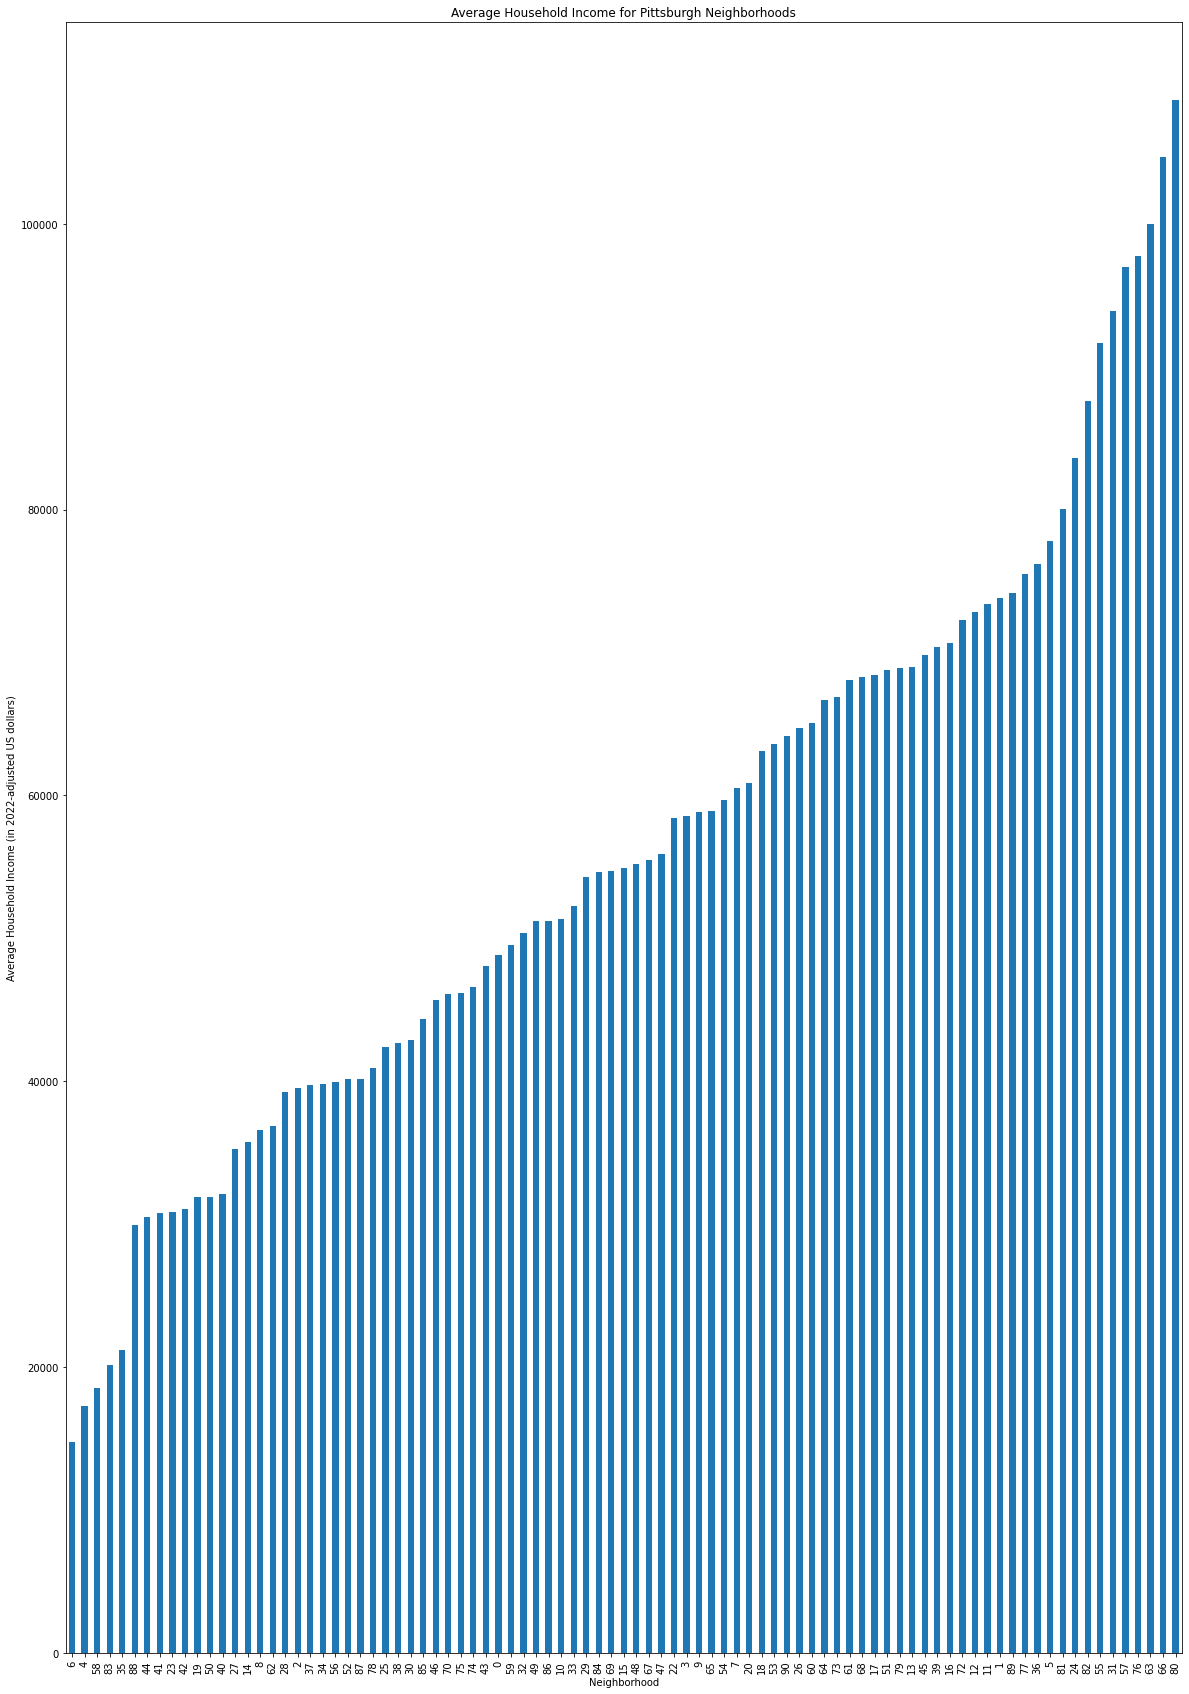

In [3]:
#hIncomeS["Average Income"].head(50)
#hIncomeS["Average Income"].plot()
i3 = 0
indexToName = []
avgInArr = []
while i3 < 89:
    neighborhood = hIncomeS.iloc[i3, 0]
    avgIn = hIncomeS.iloc[i3, 18]
    indexToName.append(neighborhood)
    avgInArr.append(avgIn)
    i3 += 1

#hIncomeSwNB = hIncomeS.DataFrame(hIncomeS["Average Income"], columns=indexToName)

#num_hIncome = hIncomeS.groupby("Neighborhood").sum()['Average Income']
#plt.legend(bbox_to_anchor=(1,1))
#hIncomeS["Average Income"].value_counts().sort_index().plot(kind='bar', rot=0)
hIncomeS["Average Income"].plot.bar( x = "Neighborhood", figsize = (20,30))

plt.title("Average Household Income for Pittsburgh Neighborhoods")
plt.xlabel("Neighborhood")
plt.ylabel("Average Household Income (in 2022-adjusted US dollars)")


Then, I plotted that data in a bar graph to help visualize the data, along with a key to allow for a quick translation from the neighborhood ID to its name. Given the space provided for a bar graph, which I chose for its specific data display abilites, printing the neighborhood names in place of the index would not be legible nor visually appealing.

In [6]:
#make print out of ID-Neighborhood; kind of like a legend 
print("ID | Neighborhood")
i4 = 0
while i4 < 91:
    neighborhoodID = hIncome.iloc[i4, 1] - 1 #adjust for array indexing
    neighborhoodName = hIncome.iloc[i4, 0]
    details = [neighborhoodID, " | ", neighborhoodName]
    print(*details)
    i4 += 1

ID | Neighborhood
0  |  Allegheny Center
1  |  Allegheny West
2  |  Allentown
3  |  Arlington
4  |  Arlington Heights
5  |  Banksville
6  |  Bedford Dwellings
7  |  Beechview
8  |  Beltzhoover
9  |  Bloomfield
10  |  Bluff
11  |  Bon Air
12  |  Brighton Heights
13  |  Brookline
14  |  California-Kirkbride
15  |  Carrick
16  |  Central Business District
17  |  Central Lawrenceville
18  |  Central Northside
19  |  Central Oakland
20  |  Chartiers City
22  |  Crafton Heights
23  |  Crawford-Roberts
24  |  Duquesne Heights
25  |  East Allegheny
26  |  East Carnegie
27  |  East Hills
28  |  East Liberty
29  |  Elliott
30  |  Esplen
31  |  Fairywood
32  |  Fineview
33  |  Friendship
34  |  Garfield
35  |  Glen Hazel
36  |  Greenfield
37  |  Hays
38  |  Hazelwood
39  |  Highland Park
40  |  Homewood North
41  |  Homewood South
42  |  Homewood West
43  |  Knoxville
44  |  Larimer
45  |  Lincoln Place
46  |  Lincoln-Lemington-Belmar
47  |  Lower Lawrenceville
48  |  Manchester
49  |  Marshall-S

IndexError: index 89 is out of bounds for axis 0 with size 89

No handles with labels found to put in legend.


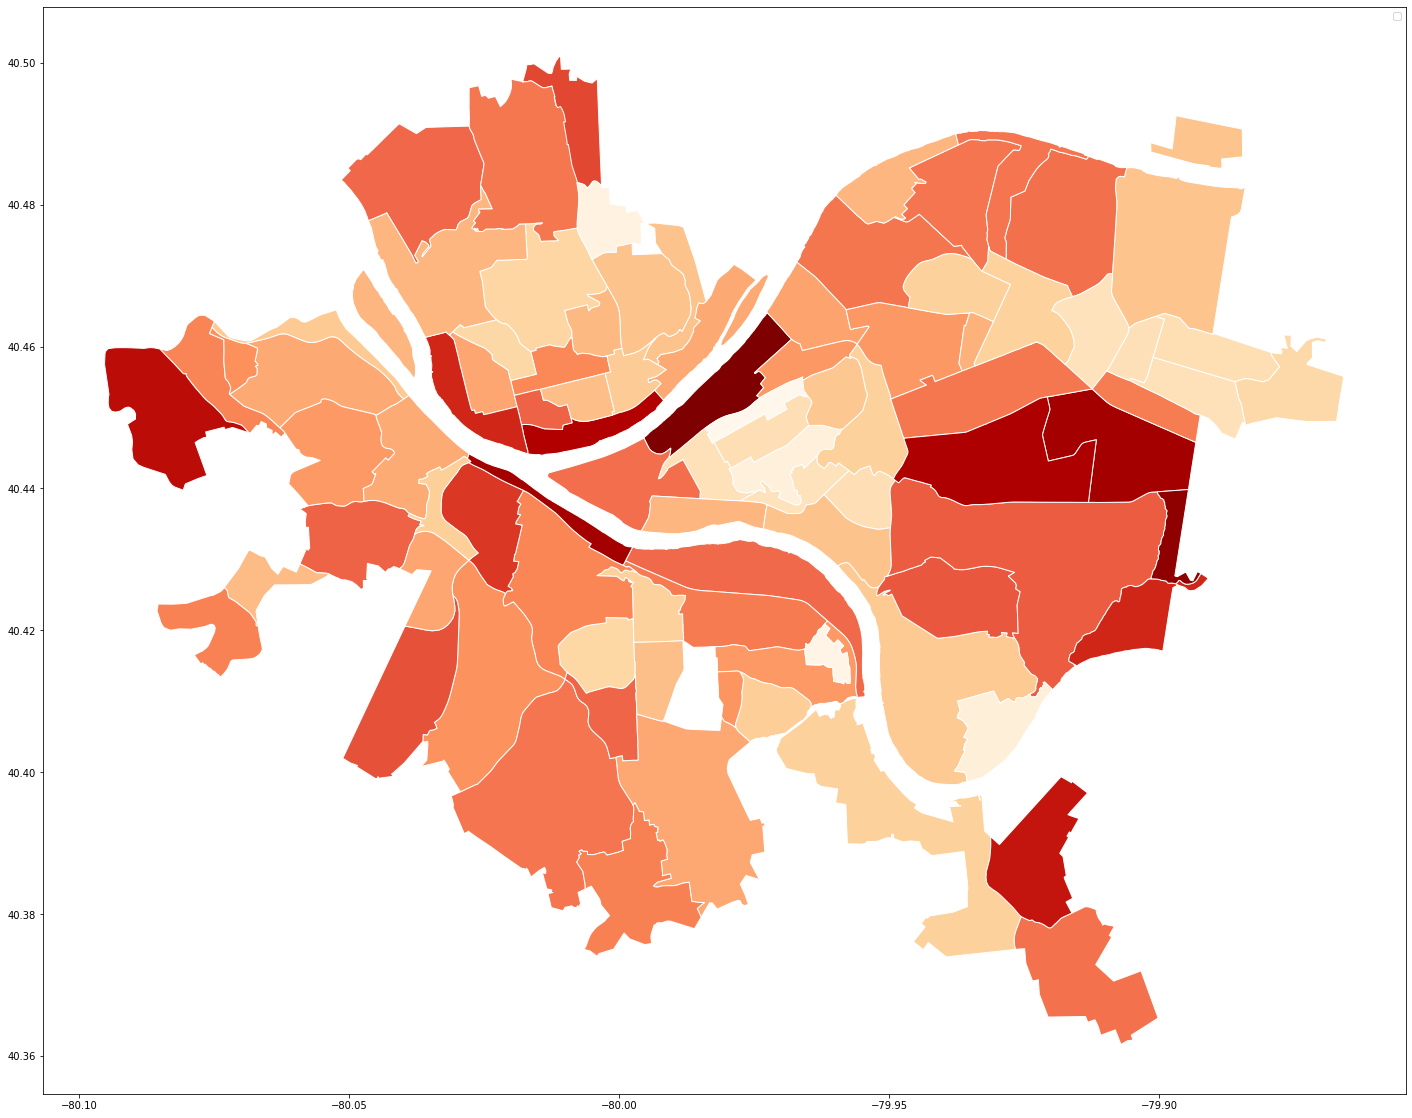

In [19]:
neighborhoods = geopandas.read_file("neighborhood/Neighborhoods_.shp")
#neighborhoods

hIncome_map = neighborhoods.merge(num_hIncome, how='left', left_on='hood', right_on='Neighborhood')
#hIncome_map = neighborhoods.join(hIncomeS.set_index("Average Income"), on = 'hood')
hIncome_map.plot(column='Average Income', cmap='OrRd', edgecolor="white", figsize=(30, 20))

plt.legend()
                # legend=True, legend_kwds={'label': "Average Income"},  missing_kwds={"color": "lightgrey"})

Finally, I used geopandas and made a heat map to show the average household income distribution across all the neighborhoods in the city. 

Conclusion 
=
Judging by my data and the analysis thereof, I declare the Strip District as the most affluent neighborhood in Pittsburgh in terms of average household income. We must remember and consider, however, that this data is not all encompassing due to the relatively low and inconsistent sample size. It was updated last in 2015, so there is a chance for change, especially when considering the drastic change in political climate in years since. Nonetheless, average household income doesn't change as drastically and, thus, this data still gives us a general idea of what neighborhood is best for high household income. 